In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

url = 'https://mercados.ambito.com//dolar/informal/grafico/2000-03-21/2023-09-15'
resp = requests.get(url)

df = pd.DataFrame(data=resp.json()[1:], columns=['Date','Blue'])
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
df['day'] = df.Date.dt.day_name()
df = df.set_index('Date').dropna()
df = df.resample('B').last()
df['pct_ch'] = df['Blue'].pct_change()

(0.25, 1.05)

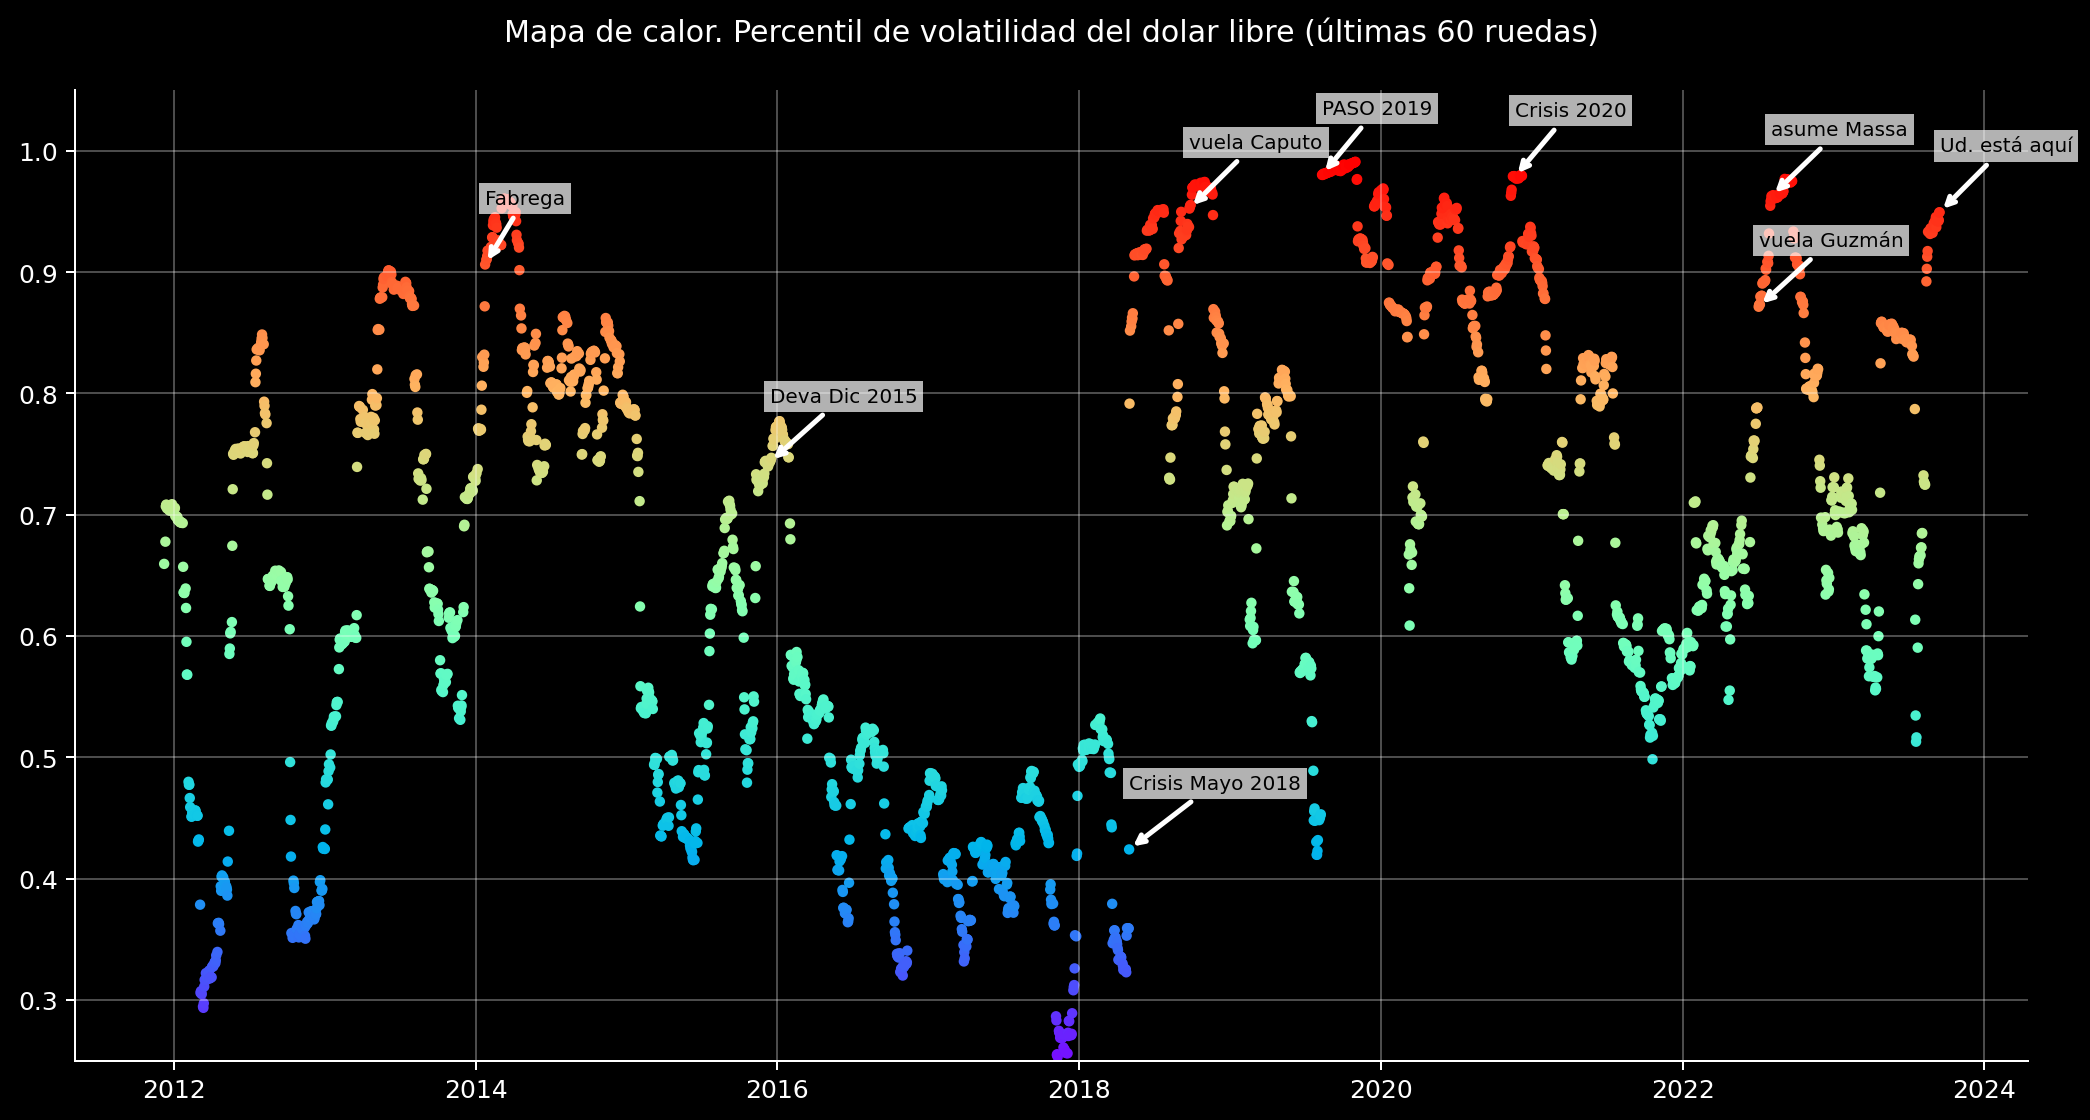

In [5]:
plt.rcParams['figure.dpi'] = 180
plt.style.use('dark_background')
anns = {datetime(2014,1,24): 'Fabrega',
        datetime(2015,12,14): 'Deva Dic 2015',
        datetime(2018,5,2): 'Crisis Mayo 2018',
        datetime(2018,9,25): 'vuela Caputo',
        datetime(2019,8,12): 'PASO 2019',
        datetime(2020,11,20): 'Crisis 2020',
        datetime(2022,7,4): 'vuela Guzmán',
        datetime(2022,8,4): 'asume Massa',
        datetime(2023,9,15): 'Ud. está aquí',
        }


r = 60
df['sigma'] = df.pct_ch.rolling(r).std().mul(250**0.5)
df['sigma_rank'] = df.sigma.rank(pct=True)
df = df.loc[df.index >= '2011-12-09']

fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(df.index, df.sigma_rank, cmap='rainbow', c=df.sigma_rank.tolist(), s=10)
ax.grid(alpha=0.3)

for date, label in anns.items():
    value = df.loc[date, 'sigma_rank']
    ax.annotate(label, xy=(date, value), xytext=(date, value+0.05), 
            arrowprops=dict(facecolor='white', arrowstyle='->', lw=2), color='k', fontsize=8,
            bbox=dict(boxstyle='square,pad=0.3', fc='white', ec='none', alpha=0.7),
           )
            
ax.set_title(f'Mapa de calor. Percentil de volatilidad del dolar libre (últimas {r} ruedas)\n')
ax.spines[['right','top']].set_visible(False)
ax.set_ylim(0.25,1.05)

(0.0, 1.05)

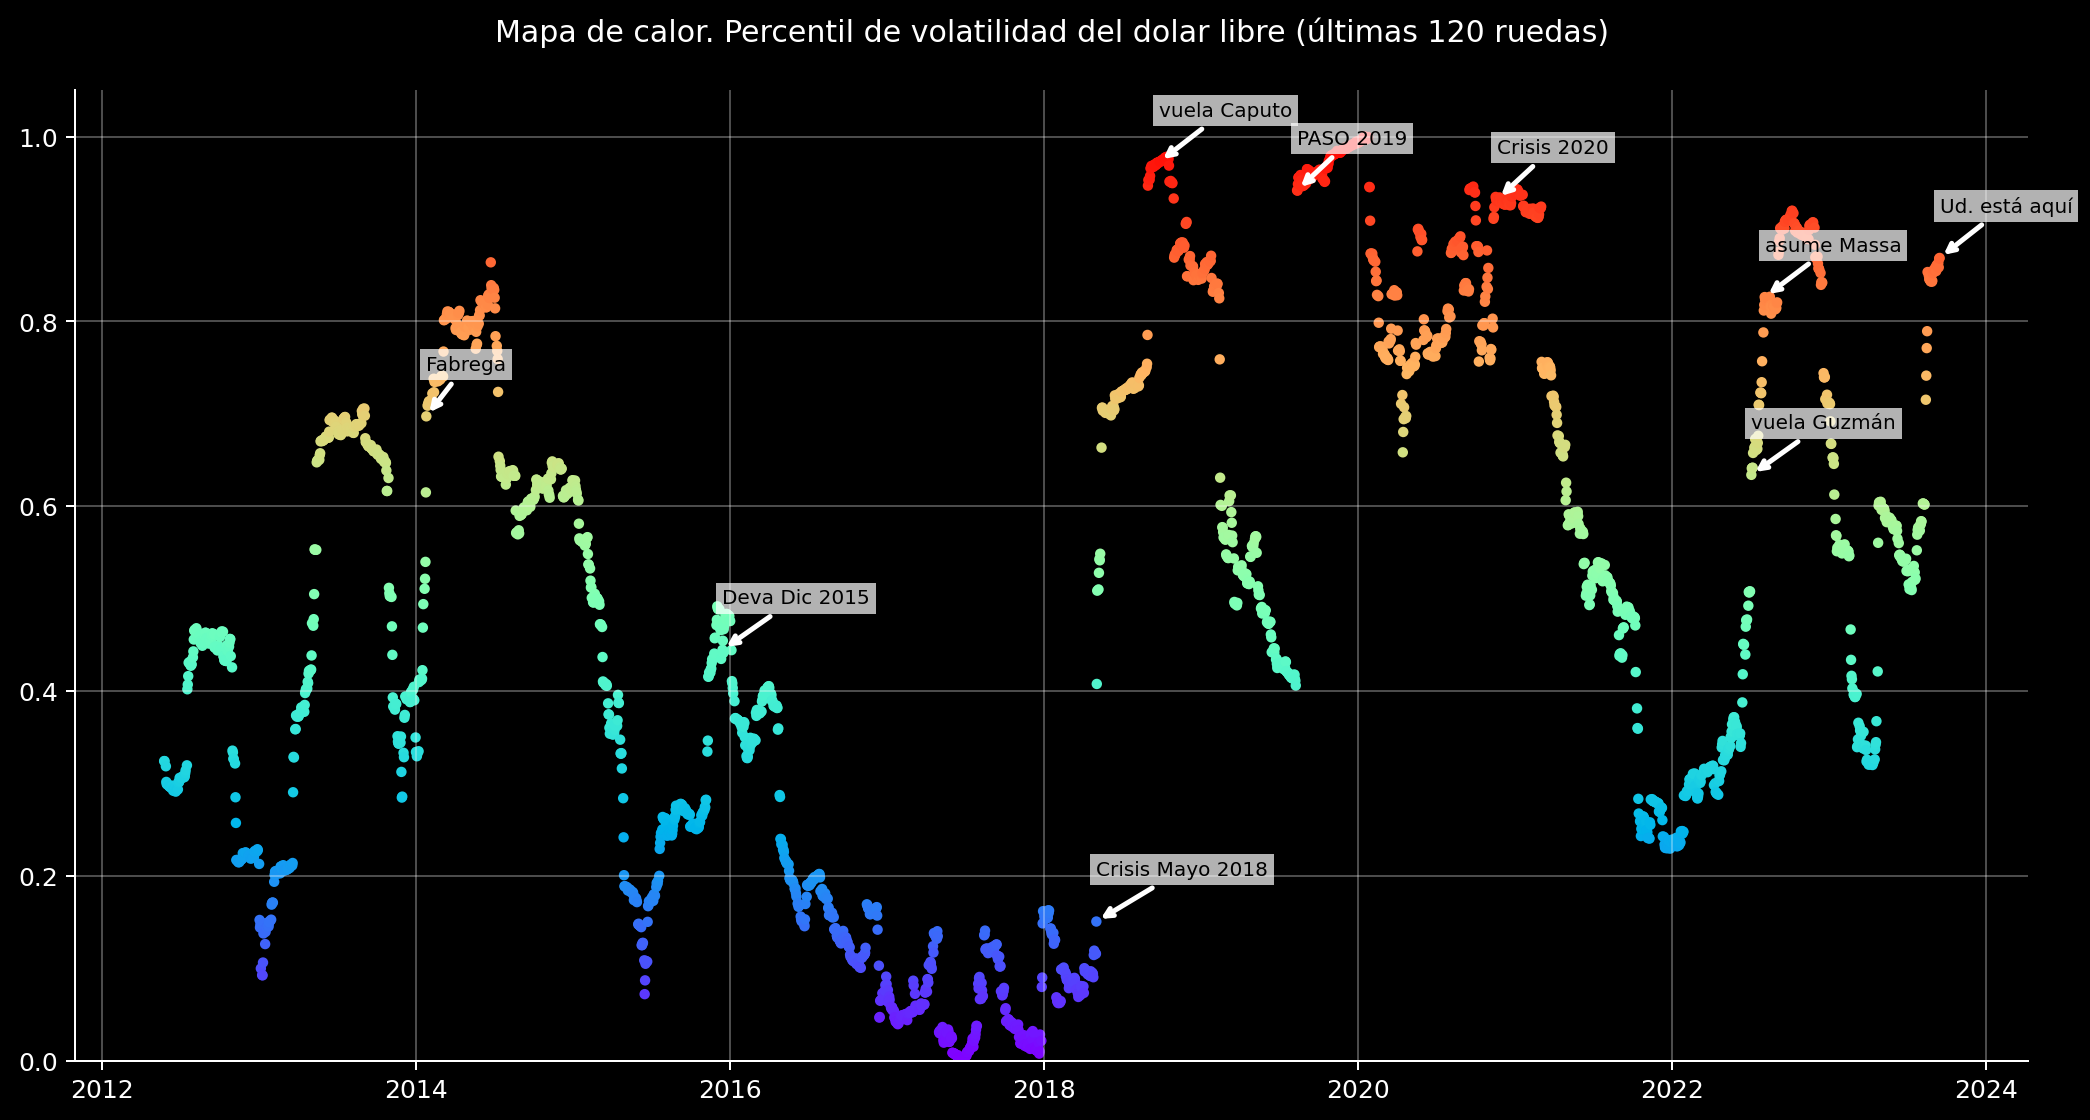

In [6]:
r = 120
df['sigma'] = df.pct_ch.rolling(r).std().mul(250**0.5)
df['sigma_rank'] = df.sigma.rank(pct=True)
df = df.loc[df.index >= '2011-12-09']

fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(df.index, df.sigma_rank, cmap='rainbow', c=df.sigma_rank.tolist(), s=10)
ax.grid(alpha=0.3)

for date, label in anns.items():
    value = df.loc[date, 'sigma_rank']
    ax.annotate(label, xy=(date, value), xytext=(date, value+0.05), 
            arrowprops=dict(facecolor='white', arrowstyle='->', lw=2), color='k', fontsize=8,
            bbox=dict(boxstyle='square,pad=0.3', fc='white', ec='none', alpha=0.7),
           )
            
ax.set_title(f'Mapa de calor. Percentil de volatilidad del dolar libre (últimas {r} ruedas)\n')
ax.spines[['right','top']].set_visible(False)
ax.set_ylim(0, 1.05)

